<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from keras import XXX
-> from tensorflow.keras import xx

In [1]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


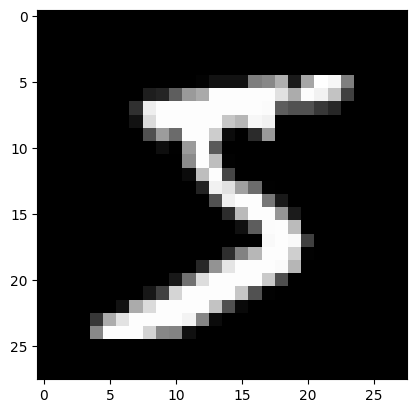

In [3]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

## 激活函式的選擇很重要

1. 輸出層: 看狀況, 分類: a. 互斥(softmax) b. 不互斥(sigmoid)
2. 中間層: relu family(m=1)

In [4]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $

$ q_i = 預測值 $

$ categorical crossentropy(標準ce) = \sum p_i log\frac{1}{q_i}$

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binary crossentropy = p log \frac {1}{q} + (1-p) log \frac {1}{1-q} $ 

In [5]:
# crossentropy:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [6]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
# !!!!!!!!!!! / 255.0
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [8]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 10s 6ms/step - loss: 0.3024 - accuracy: 0.9142 - val_loss: 0.1369 - val_accuracy: 0.9622
Epoch 2/40
540/540 [==============================] - 4s 7ms/step - loss: 0.1319 - accuracy: 0.9610 - val_loss: 0.0947 - val_accuracy: 0.9727
Epoch 3/40
540/540 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9737 - val_loss: 0.0888 - val_accuracy: 0.9748
Epoch 4/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.9801 - val_loss: 0.0727 - val_accuracy: 0.9777
Epoch 5/40
540/540 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 6/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 7/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch

In [9]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9786


[0.06912658363580704, 0.978600025177002]

如果你在tf裡, 你的答案都是帶one-hot encoding
不是的畫 都帶原本

In [10]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(i) for i in range(10)],
       columns=["{}(pred)".format(i) for i in range(10)])

313/313 [==============================] - 1s 1ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),968,0,0,1,0,2,4,1,3,1
1(true),0,1127,3,0,0,1,2,0,2,0
2(true),5,0,1002,4,2,2,3,5,9,0
3(true),0,0,0,983,0,15,0,5,5,2
4(true),0,0,4,0,962,0,3,1,1,11
5(true),2,0,0,3,0,876,6,0,3,2
6(true),6,2,0,0,1,5,941,0,3,0
7(true),0,6,10,2,0,0,0,1001,2,7
8(true),2,0,1,3,2,5,2,2,953,4
9(true),2,5,0,6,11,5,0,5,2,973


In [11]:
# 如果你不帶參數, 他會展開成為一個list, 把最大位置列出來
# 如果你帶入axis這個參數, axis=0, 直的看, 找最大值所在位置
#             axis=1(-1), 橫的看
np.array([
    [1, 3],
    [0.5, 2]
]).argmax(axis=1)

array([1, 1])

In [12]:
# demo: nonzero
np.nonzero(np.array([
    [0, 1],
    [0, 0],
    [0, 2]
]))

(array([0, 2]), array([1, 1]))

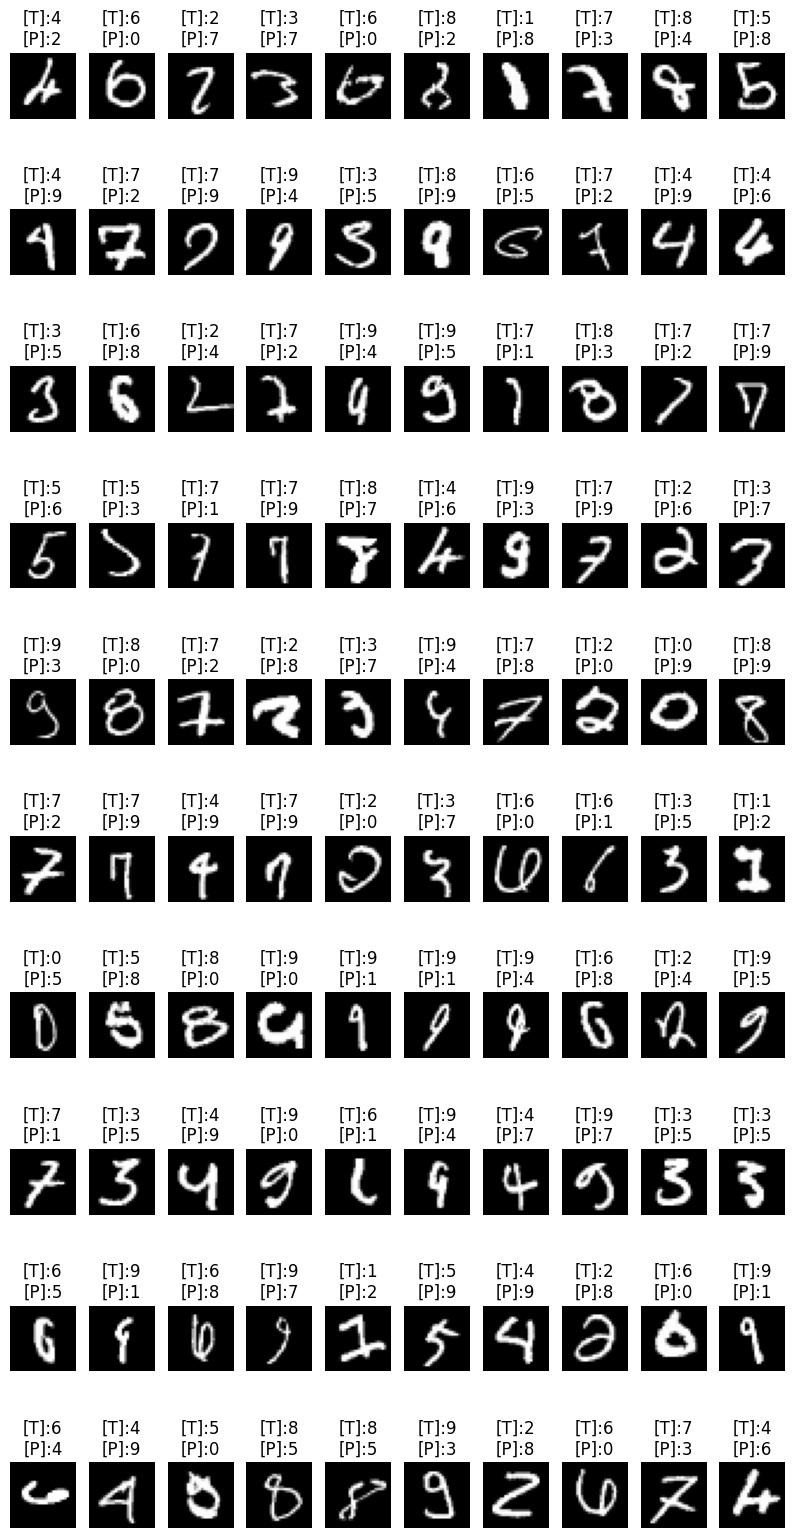

In [13]:
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
    plt.title(t)
    plt.imshow(fp_img[i], cmap="gray")

In [14]:
Image.frombytes("L", (28, 28), x_test[0]).save("test.png")

NameError: ignored

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# testx = x_test[0].reshape(1, 784) / 255.0
# model.predict(testx)

In [ ]:
from PIL import Image
fn = "test.png" #@param {type:"string"}
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
testx = img_np.reshape(1, 784) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(i, "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", ans)
plt.imshow(img_np)